In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
from PIL import Image

In [2]:
host1 = 'platzicohort10@platzicohort10.cig2rbjhhqmz.us-east-1.rds.amazonaws.com'
user1 = 'usuario_consulta'
password1 = 'platzicohort10'
database1 = 'Brazilian_e_commerce'

engine = create_engine('postgresql+psycopg2://'+
                       user1+':'+
                       host1+'/'+
                       database1)

In [12]:
def query_psql(consulta):
    with engine.connect() as con:
        rs = con.execute(consulta)
        cols = rs.keys()
        row = rs.fetchall()
        df = pd.DataFrame(row)
        df.columns = cols
    return df

In [13]:
with engine.connect() as con:
    rs = con.execute("""SELECT * FROM pg_catalog.pg_tables 
                      WHERE schemaname != 'pg_catalog' 
                      AND schemaname != 'information_schema'""")
    row = rs.fetchall()
    df_tables = pd.DataFrame(row)
    print(f'Tablas de la base de datos:\n {df_tables[1]}')

with engine.connect() as con:
    rs = con.execute("SELECT product_id,price FROM olist_order_items_dataset WHERE price > 6000") # query que vamos a realizar
    df = pd.DataFrame(rs.fetchall()) # lectura de las filas, hay mas opciones
    df.columns = rs.keys()

sql1 = "SELECT * FROM olist_orders_dataset"
orders = query_psql(sql1)
orders.order_purchase_timestamp = orders.order_purchase_timestamp.astype('datetime64[ns]')
sql2 = "SELECT * FROM olist_order_items_dataset"
order_items = query_psql(sql2)

#Juntar dataframes
df_order = pd.merge(left = order_items, right = orders,
                   how = "inner",
                   left_on = ["order_id"],
                   right_on = ["order_id"])

DatabaseError: (psycopg2.DatabaseError) could not receive data from server: Connection timed out
SSL SYSCALL error: Connection timed out

[SQL: SELECT * FROM pg_catalog.pg_tables 
                      WHERE schemaname != 'pg_catalog' 
                      AND schemaname != 'information_schema']
(Background on this error at: http://sqlalche.me/e/13/4xp6)

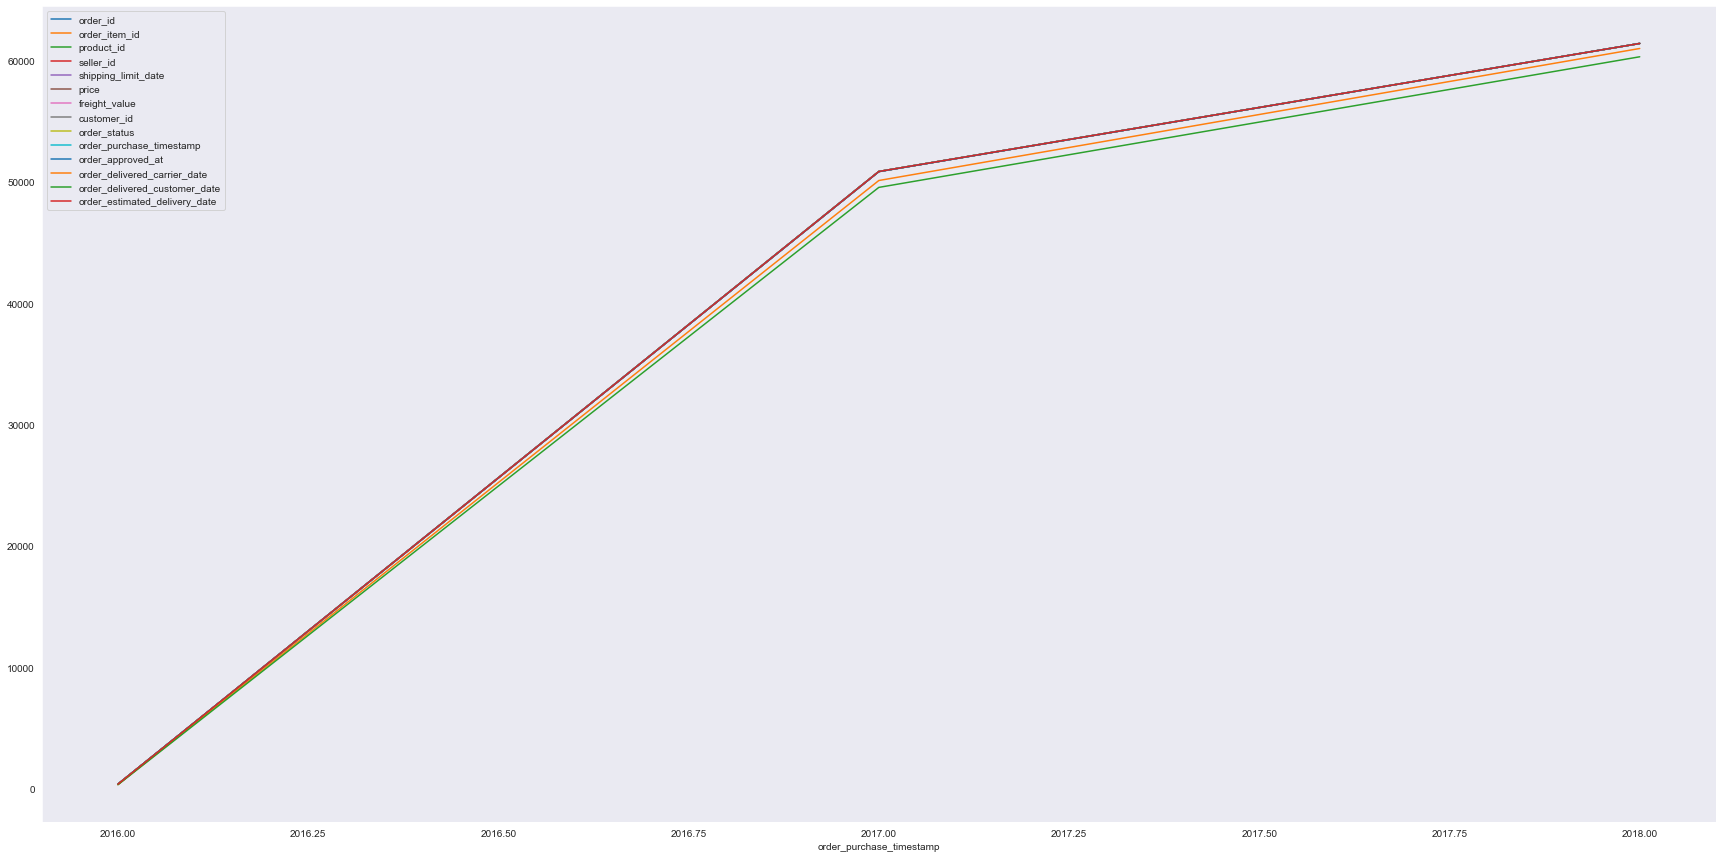

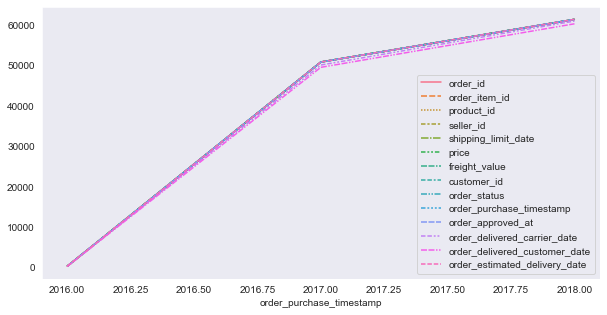

In [15]:
df_ord = df_order.sort_values(by='order_purchase_timestamp') 
df_ord.index = df_ord.order_purchase_timestamp
dfplot = df_ord.groupby(df_ord['order_purchase_timestamp'].dt.year).count()
dfplot.plot(figsize=(30,15))
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style("dark")
ax = sns.lineplot(data=dfplot)

In [18]:
dfplot2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,,,,,,,,
2016-09-04,2,2,2,2,2,2,2,2,2,2,2,2,0,2
2016-09-05,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2016-09-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
equis = np.transpose(dfplot2.index)

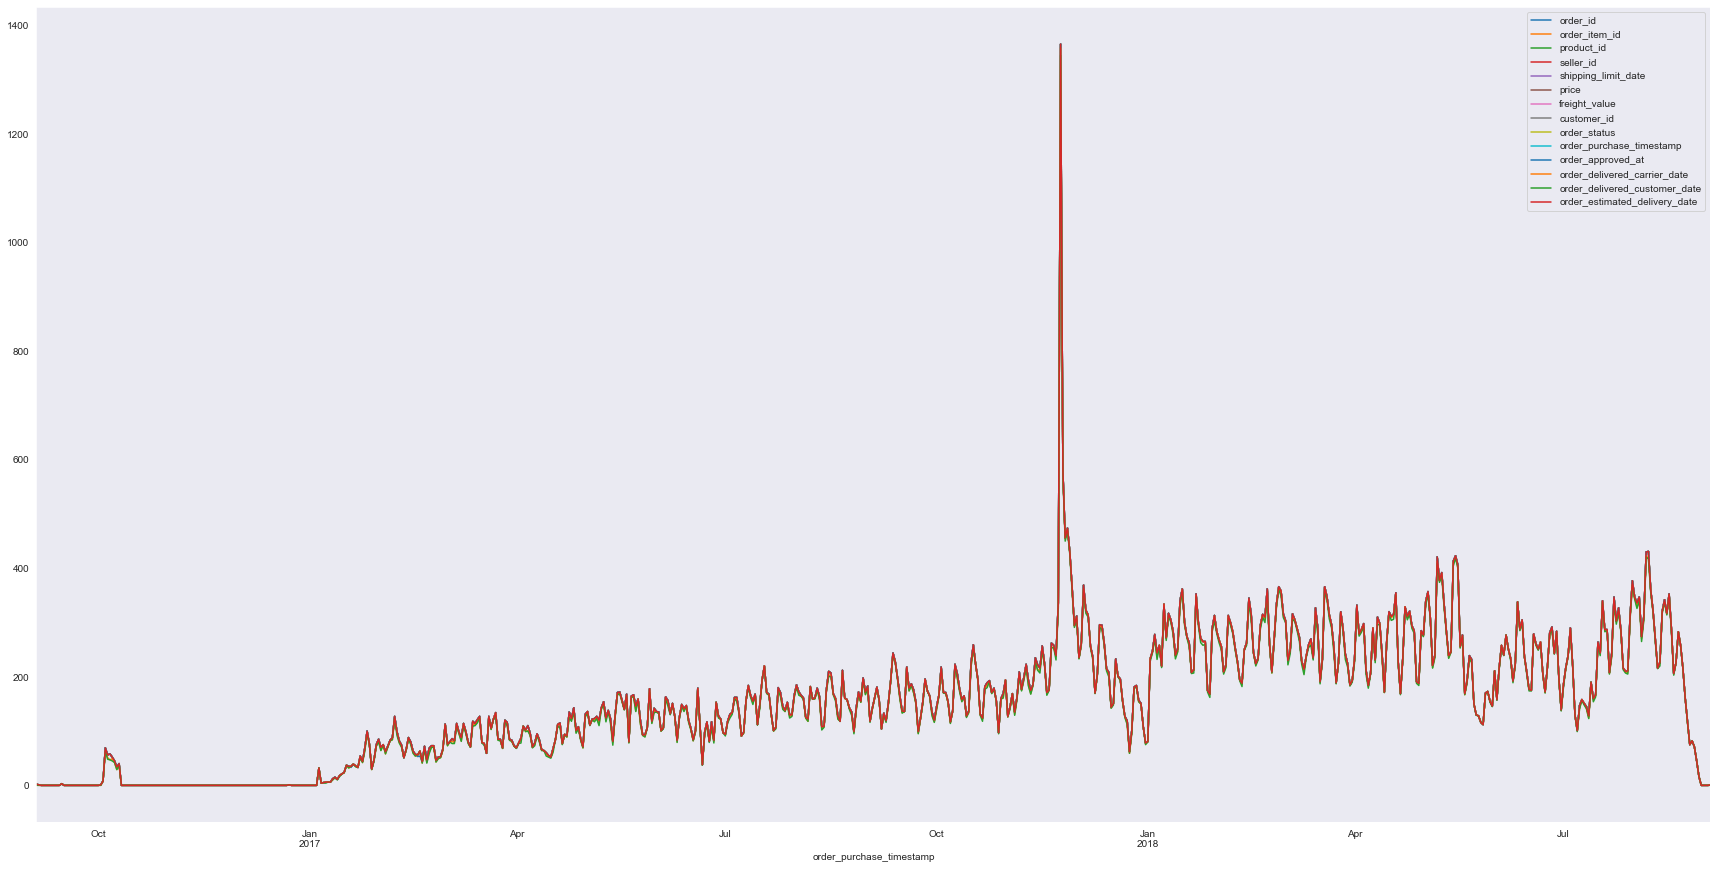

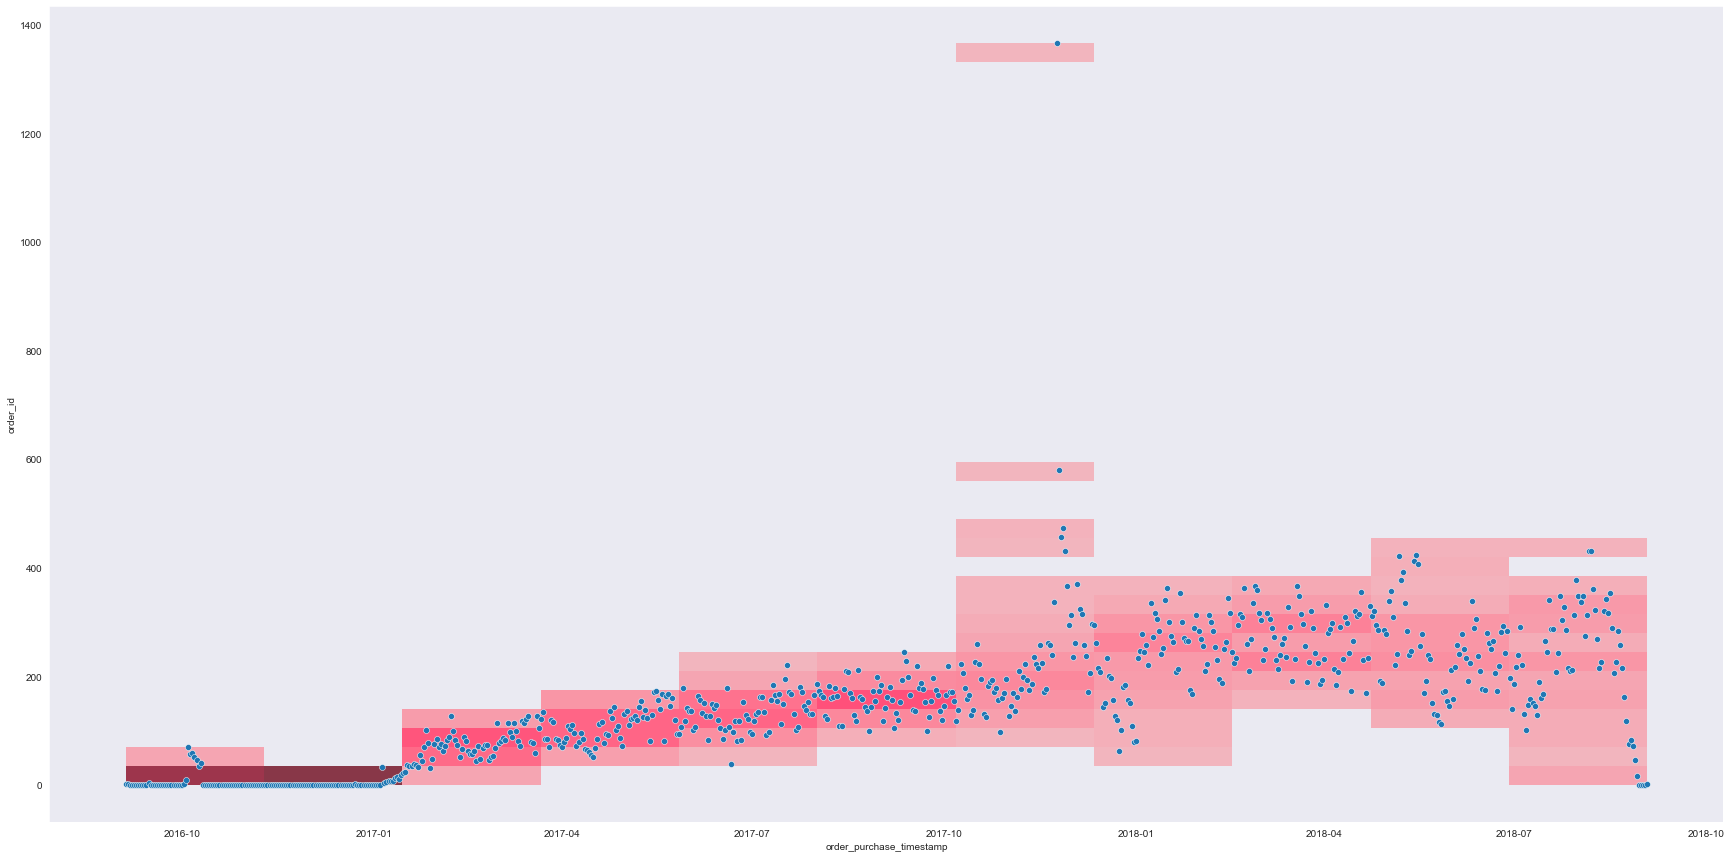

In [45]:
dfplot2 = df_ord.resample('D').count()
dfplot2.plot(figsize=(30,15))
fig2, ax2 = plt.subplots(figsize=(30, 15))
sns.set_style("dark")
#ax2 = sns.lineplot(data=dfplot2)
ax2 = sns.histplot(data=dfplot2,x=equis,y='order_id',color='lightpink')
ax2 = sns.scatterplot(data=dfplot2,x=equis,y='order_id')

In [47]:
dfplot3.head()

,order_item_id,price,freight_value
order_purchase_timestamp,,,
2016-09-04,1.5,36.445,31.67
2016-09-05,1.0,59.500,15.56
2016-09-06,NaN,NaN,NaN
2016-09-07,NaN,NaN,NaN
2016-09-08,NaN,NaN,NaN


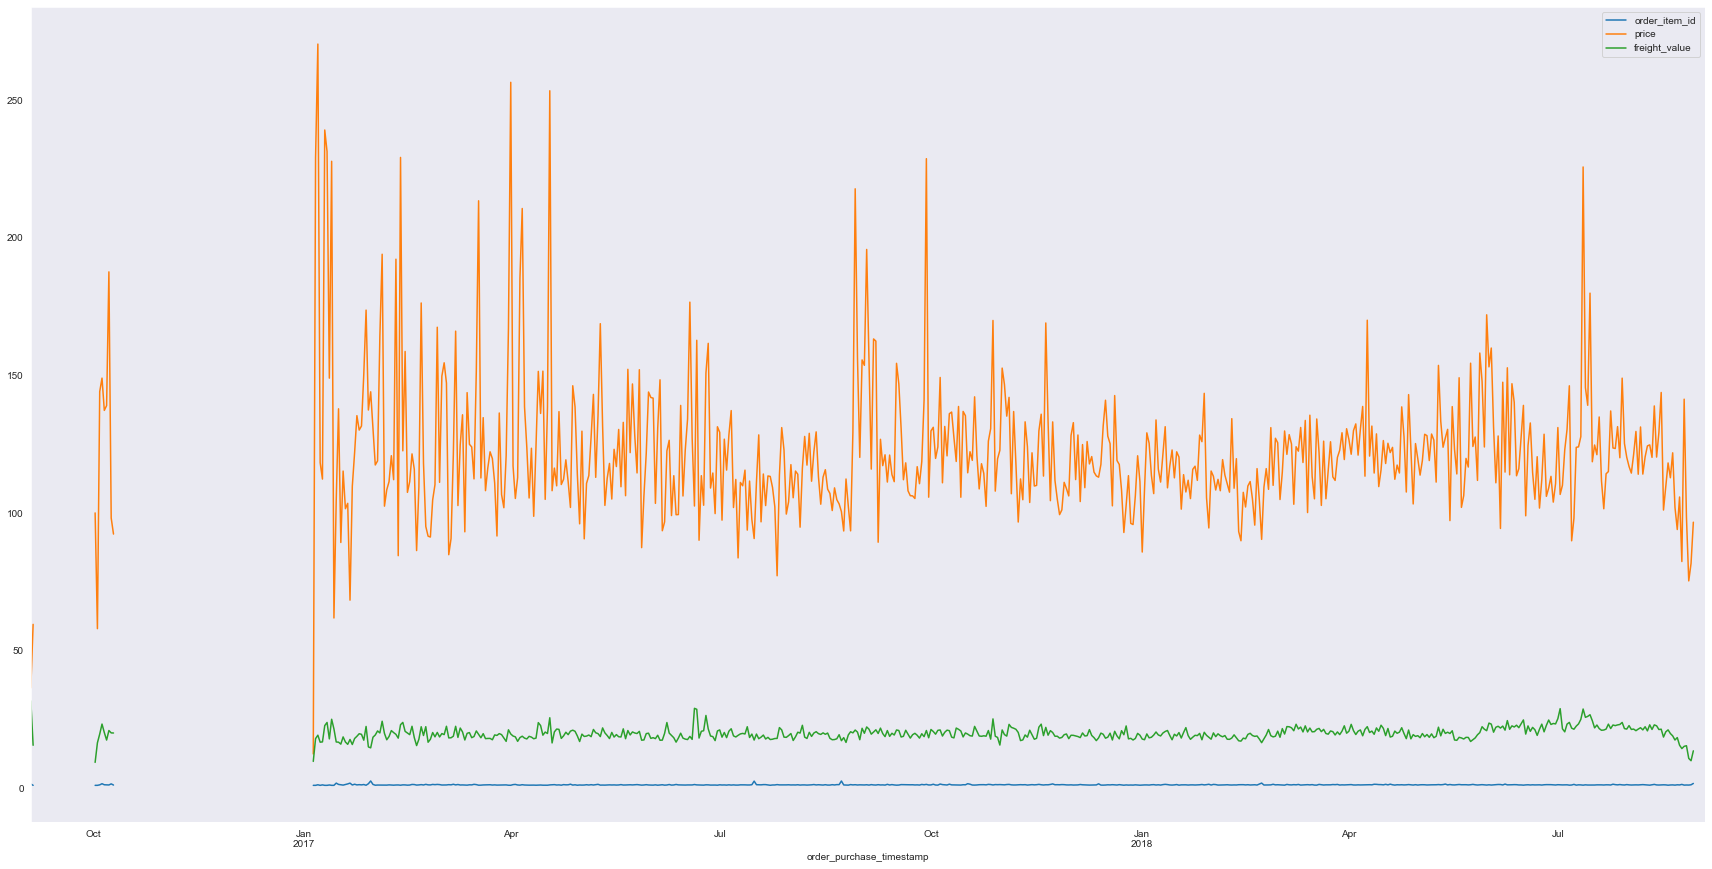

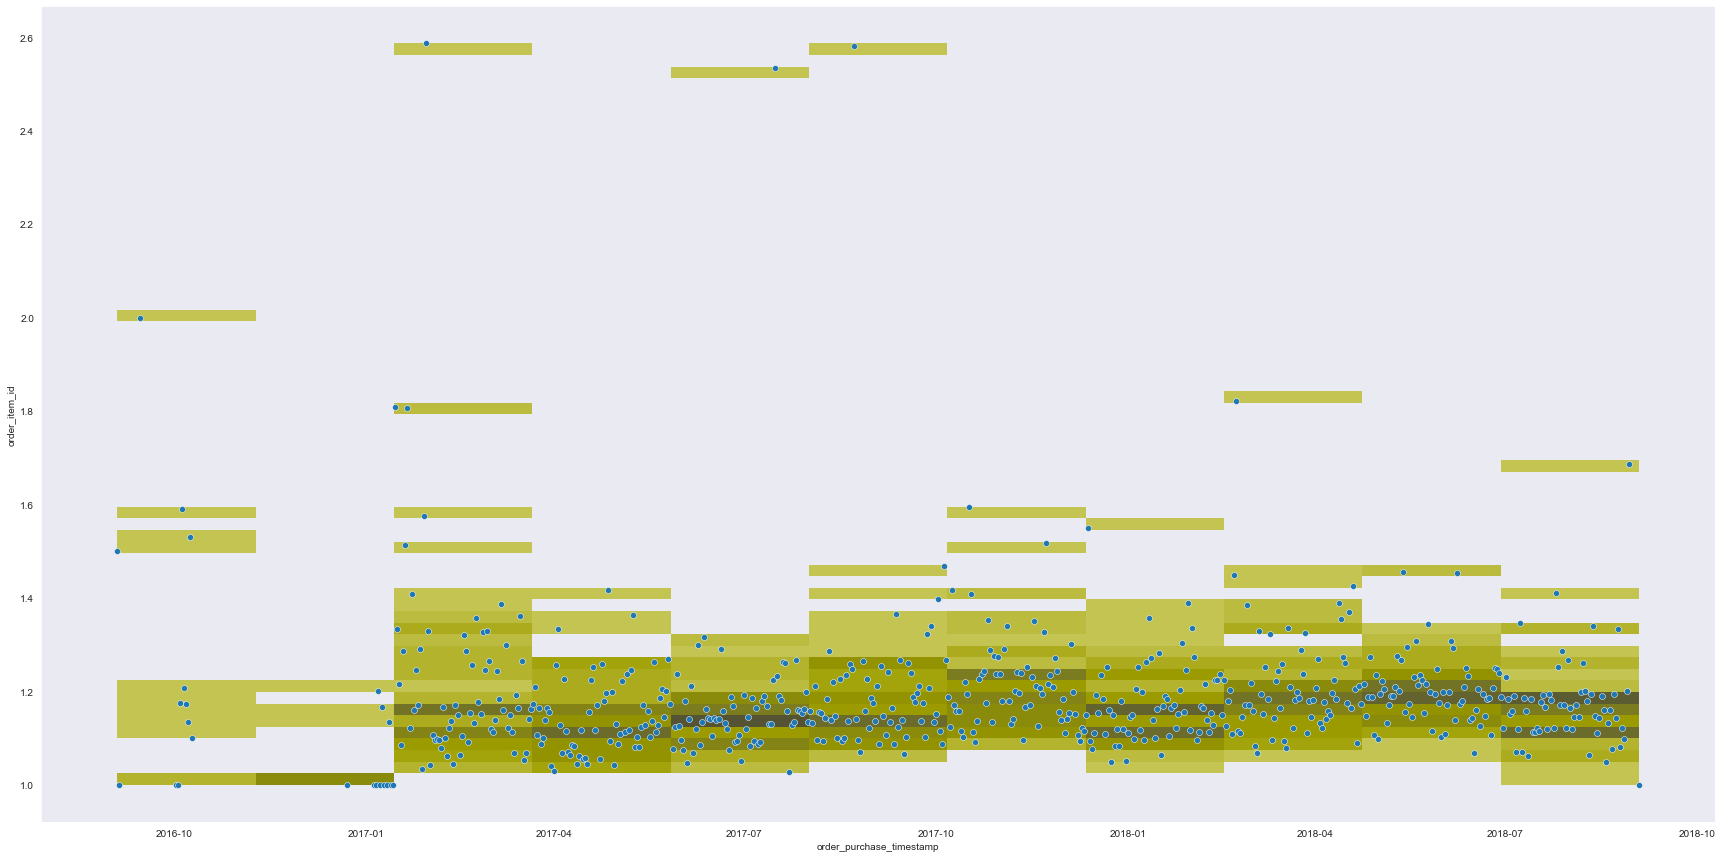

In [58]:
dfplot3 = df_ord.resample('D').mean()
dfplot3.plot(figsize=(30,15))
fig3, ax3 = plt.subplots(figsize=(30, 15))
sns.set_style("dark")
#ax3 = sns.lineplot(data=dfplot3)
ax3 = sns.histplot(data=dfplot3,x=equis,y='order_item_id',color='yellow')
ax3 = sns.scatterplot(data=dfplot3,x=equis,y='order_item_id')

In [52]:
dfplot4.head()

,order_item_id,price,freight_value
order_purchase_timestamp,,,
2016-09-04,1.5,36.445,31.67
2016-09-05,1.0,59.500,15.56
2016-09-06,NaN,NaN,NaN
2016-09-07,NaN,NaN,NaN
2016-09-08,NaN,NaN,NaN


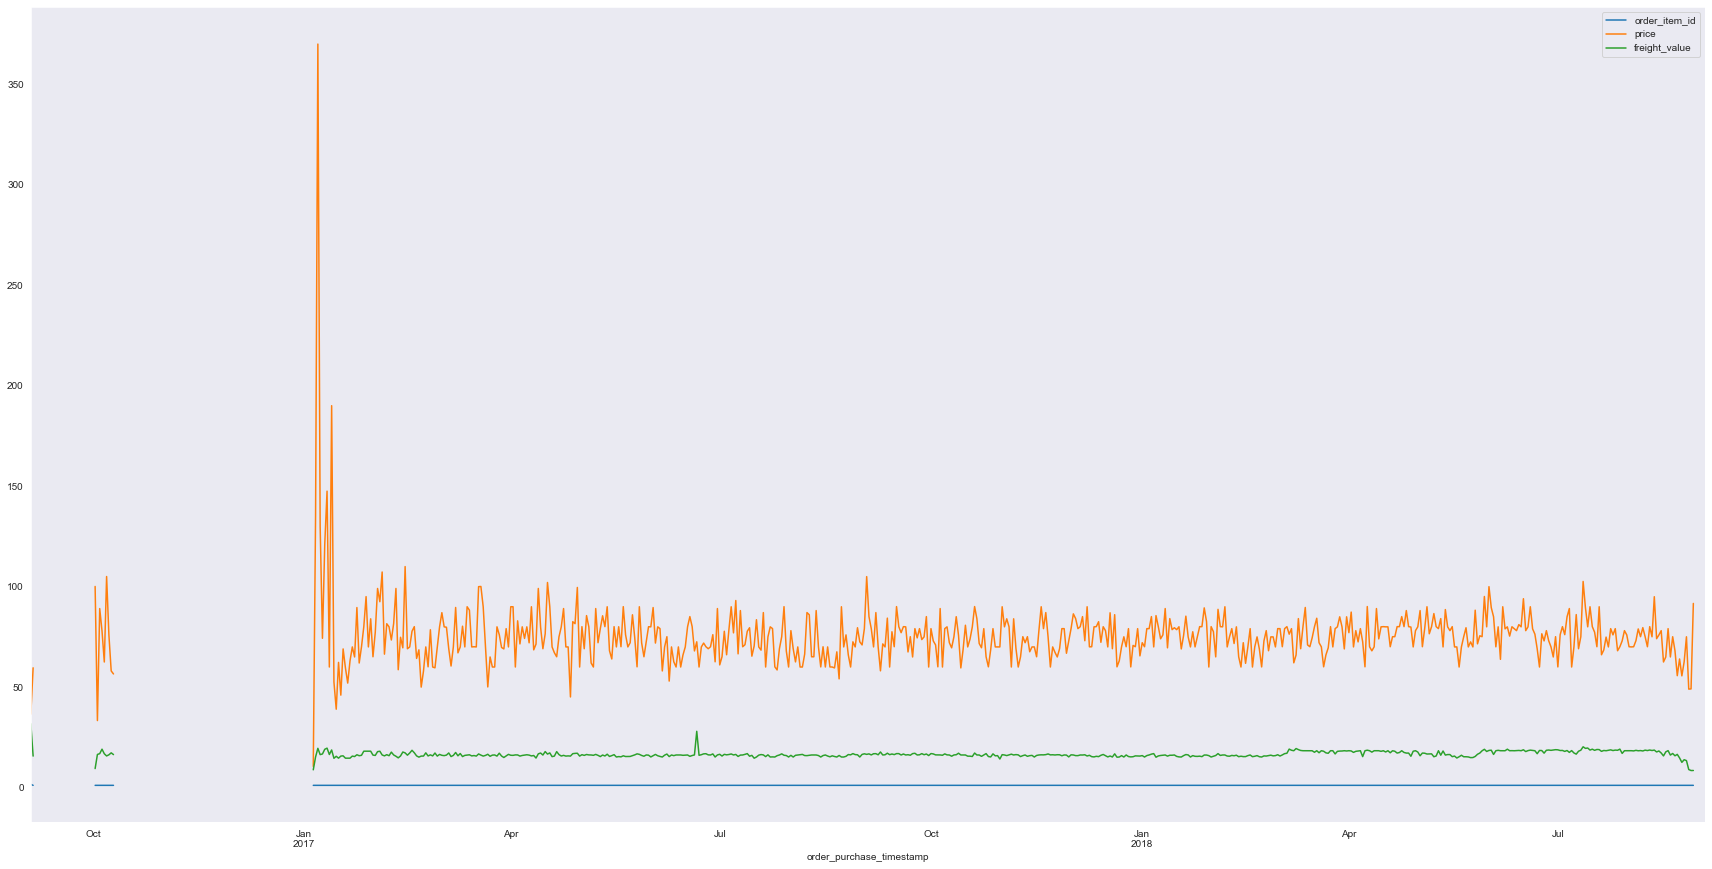

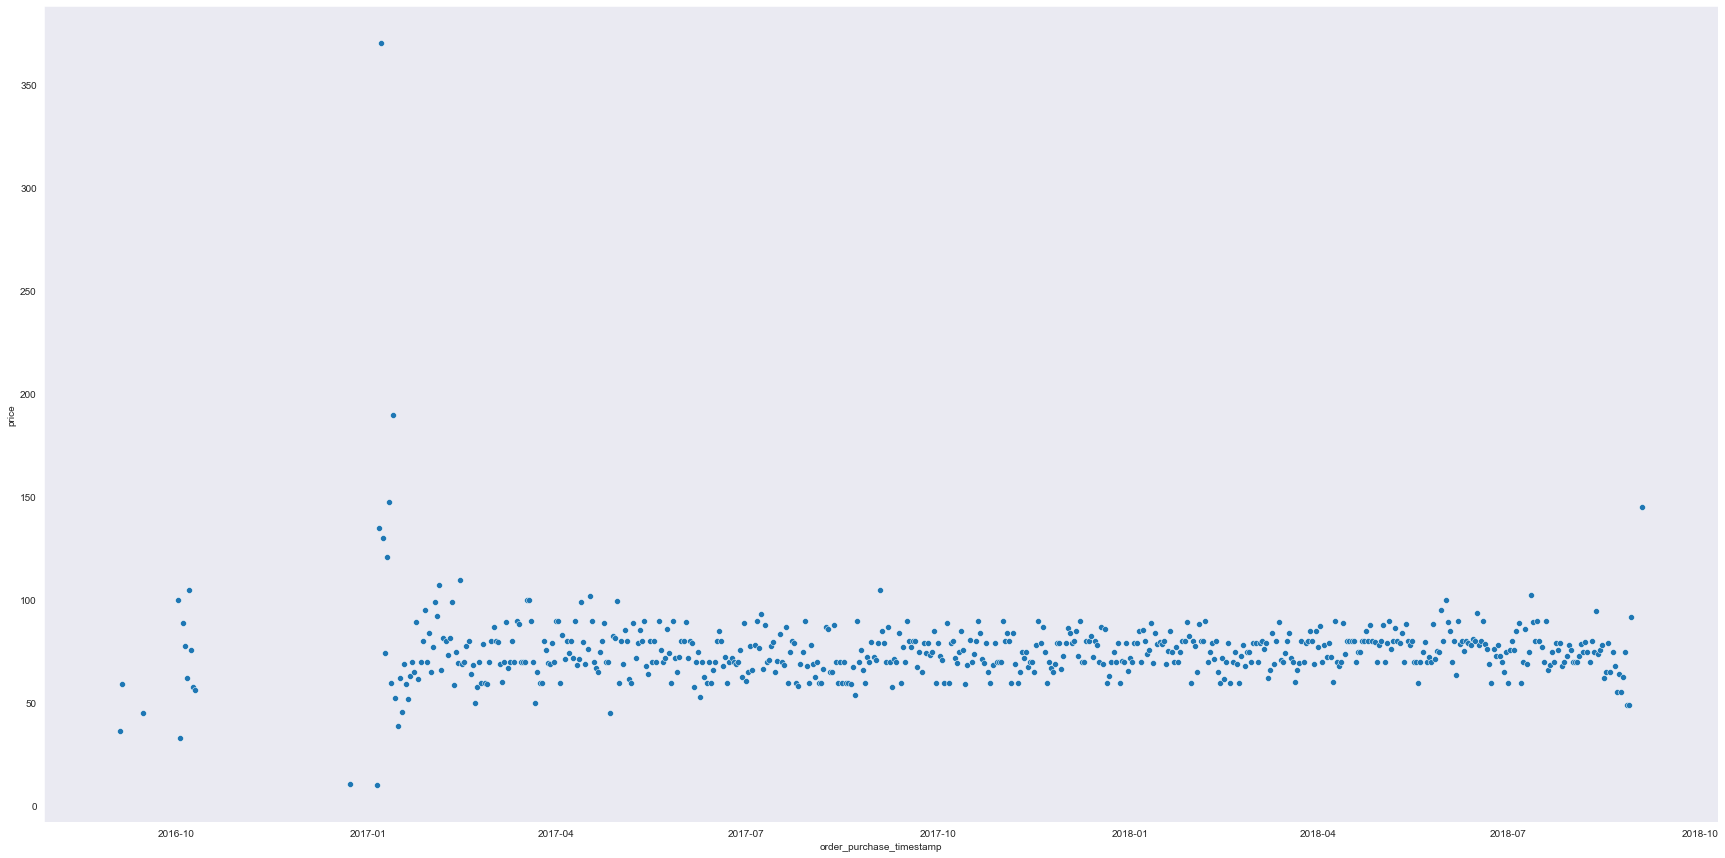

In [61]:
dfplot4 = df_ord.resample('D').median()
dfplot4.plot(figsize=(30,15))
fig4, ax4 = plt.subplots(figsize=(30, 15))
sns.set_style("dark")
#ax4 = sns.lineplot(data=dfplot4)
#ax4 = sns.histplot(data=dfplot4,x=equis,y='price')
ax4 = sns.scatterplot(data=dfplot4,x=equis,y='price')